In [6]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
# CSVファイルのパス
csv_path = '1st_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
'Kp','Ki','Kd','Ki/|Kp|','Kd/|Kp|','Kd/|Kp|-Ki/|Kp|',
'Med_purchase_num','Max_purchase_num','Total number of shares purchased','Med stock price at time of purchase',
'Med stock price change rate at time of purchase'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp','Ki','Kd','Ki/|Kp|','Kd/|Kp|','Kd/|Kp|-Ki/|Kp|',
    'Med_purch_num', 'Max_purch_num', 'Total_shares_purchased', 'Med_stock_price_purchase',
    'Med_price_change_rate_purchase'
]

data.columns = short_column_names

# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')


# NetworkXグラフの作成
G = nx.Graph()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation = correlation_matrix.loc[col1, col2]
            G.add_edge(col1, col2, weight=correlation)

# pyvisグラフに変換
nt = Network(height="800px", width="100%")
nt.from_nx(G)

# グラフの表示
#nt.show("1st_trading_trend_graph.html")
#グラフの保存と表示
nt.save_graph("correlation_graph.html")
#nt.show("correlation_graph.html")

In [16]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# CSVファイルのパス
csv_path = '1st_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
    'Kp', 'Ki', 'Kd', 'Ki/|Kp|', 'Kd/|Kp|', 'Kd/|Kp|-Ki/|Kp|',
    'Med_purchase_num', 'Max_purchase_num', 'Total number of shares purchased',
    'Med stock price at the time of purchase', 'Med stock price change rate at the time of purchase'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp', 'Ki', 'Kd', 'Ki/|Kp|', 'Kd/|Kp|', 'Kd/|Kp|-Ki/|Kp|',
    'Med_purch_num', 'Max_purch_num', 'Total_shares_purchased', 'Med_stock_price_purchase',
    'Med_price_change_rate_purchase'
]

data.columns = short_column_names

# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# NetworkXグラフの作成
G = nx.Graph()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation = correlation_matrix.loc[col1, col2]
            G.add_edge(col1, col2, weight=correlation)

# pyvisグラフに変換
nt = Network(height="800px", width="100%")

# グラフにエッジと相関係数を追加
for edge in G.edges(data=True):
    source, target, data = edge
    correlation = data['weight']
    nt.add_edge(source, target, value=correlation, title=f'Correlation: {correlation:.2f}')

# グラフの表示
# nt.show("1st_trading_trend_graph.html")
# グラフの保存と表示
nt.save_graph("correlation_graph2.html")
# nt.show("correlation_graph.html")


ValueError: Usecols do not match columns, columns expected but not found: ['Med stock price change rate at the time of purchase', 'Med stock price at the time of purchase']

In [17]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# CSVファイルのパス
csv_path = '2nd_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
    'Kp','Ki','Kd','Ki/|Kp|','Kd/|Kp|','Kd/|Kp|-Ki/|Kp|',
    'Med_purchase_num', 'Max_purchase_num', 'Total number of shares purchased', 'Med stock price at time of purchase',
    'Med stock price change rate at time of purchase'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp','Ki','Kd','Ki/|Kp|','Kd/|Kp|','Kd/|Kp|-Ki/|Kp|',
    'Med_purch_num', 'Max_purch_num', 'Total_shares_purchased', 'Med_stock_price_purchase',
    'Med_price_change_rate_purchase'
]

data.columns = short_column_names

# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# NetworkXグラフの作成
G = nx.Graph()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation = correlation_matrix.loc[col1, col2]
            if abs(correlation) >= 0.5:  # 絶対値が0.5以上のエッジだけを追加
                G.add_edge(col1, col2, weight=correlation)

# pyvisグラフに変換
nt = Network(height="800px", width="100%")

# エッジの太さを指定
edge_widths = [data['weight'][i] * 5 for i in range(len(G.edges))]

nt.from_nx(G)
nt.edges["width"] = edge_widths

# グラフの保存と表示
nt.save_graph("correlation_graph.html")
# nt.show("correlation_graph.html")  # グラフを表示する場合はコメントアウトを外す


KeyError: 'weight'

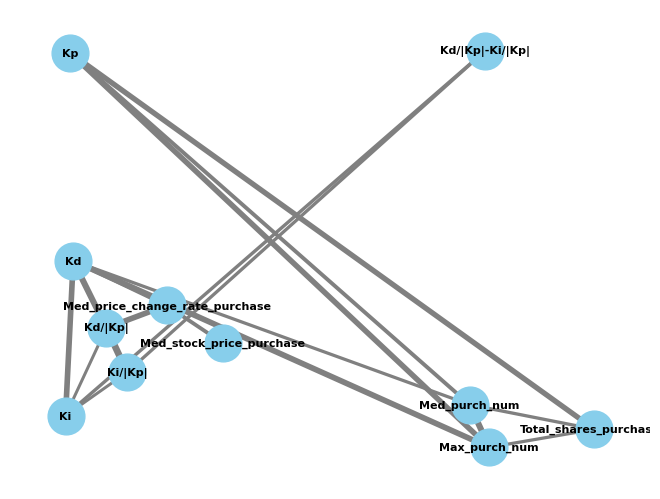

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_path = '1st_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
    'Kp','Ki','Kd','Ki/|Kp|','Kd/|Kp|','Kd/|Kp|-Ki/|Kp|',
    'Med_purchase_num', 'Max_purchase_num', 'Total number of shares purchased', 'Med stock price at time of purchase',
    'Med stock price change rate at time of purchase'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp','Ki','Kd','Ki/|Kp|','Kd/|Kp|','Kd/|Kp|-Ki/|Kp|',
    'Med_purch_num', 'Max_purch_num', 'Total_shares_purchased', 'Med_stock_price_purchase',
    'Med_price_change_rate_purchase'
]

data.columns = short_column_names

# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# NetworkXグラフの作成
G = nx.Graph()
edge_thickness = []  # エッジの太さを格納するリスト

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation = correlation_matrix.loc[col1, col2]
            if abs(correlation) >= 0.4:  # 0.4以上の相関係数を持つエッジだけを追加
                G.add_edge(col1, col2, weight=correlation)
                edge_thickness.append(abs(correlation) * 5)  # エッジの太さを相関係数に比例させる

# グラフの描画
pos = nx.spring_layout(G)  # レイアウトの設定
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=labels, font_size=8, font_color="black", font_weight="bold",
        node_size=700, node_color="skyblue", edge_color="gray", width=edge_thickness, edge_cmap=plt.cm.Blues)

# 描画したグラフを表示
plt.show()


KeyError: 'K'

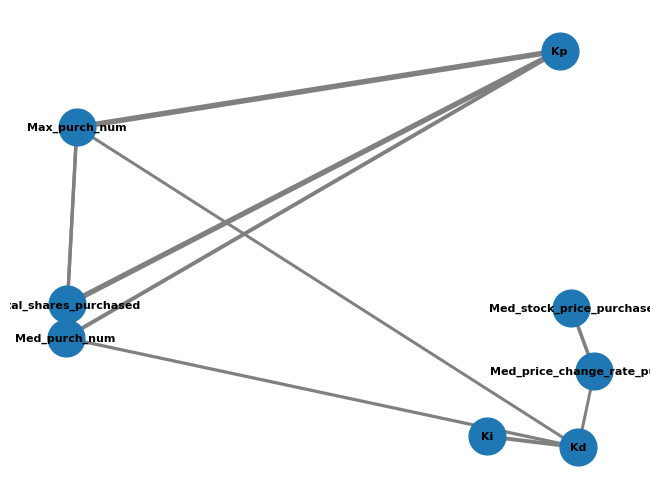

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_path = '1st_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
    'Kp','Ki','Kd',
    'Med_purchase_num', 'Max_purchase_num', 'Total number of shares purchased', 'Med stock price at time of purchase',
    'Med stock price change rate at time of purchase'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp','Ki','Kd',
    'Med_purch_num', 'Max_purch_num', 'Total_shares_purchased', 'Med_stock_price_purchase',
    'Med_price_change_rate_purchase'
]

data.columns = short_column_names

# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# NetworkXグラフの作成
G = nx.Graph()
edge_thickness = []  # エッジの太さを格納するリスト
edge_labels = {}  # エッジのラベルを格納する辞書

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation = correlation_matrix.loc[col1, col2]
            if abs(correlation) >= 0.4:  # 0.4以上の相関係数を持つエッジだけを追加
                G.add_edge(col1, col2, weight=correlation)
                edge_thickness.append(abs(correlation) * 5)  # エッジの太さを相関係数に比例させる
                edge_labels[(col1, col2)] = f"{correlation:.2f}"  # エッジのラベルに相関係数の値を追加

# グラフの描画
pos = nx.spring_layout(G)  # レイアウトの設定
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=labels, font_size=8, font_color="black", font_weight="bold",
        node_size=700, edge_color="gray", width=edge_thickness, edge_cmap=plt.cm.Blues)

# エッジの相関係数の値を描画
edge_label_pos = {(k[0], k[1]): ((pos[k[0]][0] + pos[k[1]][0]) / 2, (pos[k[0]][1] + pos[k[1]][1]) / 2) for k in pos.keys()}
nx.draw_networkx_edge_labels(G, pos=edge_label_pos, edge_labels=edge_labels, font_color='red', font_size=8)

# 描画したグラフを表示
plt.show()


In [3]:
from pyvis.network import Network

net = Network()

net.add_node('A')
net.add_node('B')
net.add_nodes(['C', 'D', 'E'])

net.add_edge('A','B')
net.add_edge('A','C')
net.add_edges([('A','D'), ('B','D'), ('D','E')])

net.show("pyvis5-1.html")

pyvis5-1.html


AttributeError: 'NoneType' object has no attribute 'render'